# HW4B: Stochastic Gradient Descent and Lipschitz Extensions

### Bhaven Patel
### 4/30/2019

I worked with Anthony Rentsch, Lipika Ramaswamy, and Karina Huang on this homework.

My code can be found on my [Github](https://github.com/bhavenp/cs208/blob/master/homework/HW4b/HW4b_Bhaven_Patel.ipynb).

## Problem 1
### (a)

$G = \mathbb{R}^n$, $H = [a,b]^n$, $x\sim x'$ differ on one row, $f(x) = \dfrac{1}{n} \sum_{i=1}^n x_i$

**(i)**<br>
The global sensitivity $GS_f(x) = \infty$ because we can change any value in the dataset $x$ to $\infty$ (or some arbitrarily large number) to get a neighboring dataset $x'$. Thus, this would change the mean by $\infty$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = \infty$ because the best case dataset $x$ would be a one-value dataset/array $x=[x_1]$, where $x_1$ is any value. The worst case neighboring dataset $x'$ would be a one-value dataset/array $x'=[x'_1]$, where $x'_1 = \infty$ (or some very large number). Thus, the difference between $f(x)$ and $f(x')$ would be infinite like the global sensitivity case.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = \dfrac{b-a}{n}$ because in the worst case we have a dataset $x=[a]^n$ and a neighboring dataset $x'=[a,...,a, b]$, so the difference between $f(x)$ and $f(x')$ would be $\dfrac{b-a}{n}$, which is much less than the global sensitivity or the minimum local sensitivity.
<br>
<br>

**Lipschitz entension**<br>
A Lipschitz entension of $f$ would be
$$
f'(x) = \dfrac{1}{n} \sum_{i=1}^n [x_i]_a^b
$$
where each $x_i$ is clipped to be between $a$ and $b$. 

This obeys the first condition of a Lipschitz entension that $f'(x)$ agrees with $f(x)$ on $H$ because any datasets $x \in H$ are already clipped so the elements $x_i$ are between $a$ and $b$, so $f'(x) = f(x)$.

$f'(x)$ also obeys the second condition of a Lipschitz entension that $GS_{f'} = RS_{f'}^H$ because the $GS_{f'}=\dfrac{b-a}{n}$ because all the values in the datasets $x$ and $x'$ will be clipped to be between $a$ and $b$, so the worst case difference between $f'(x)$ and $f'(x')$ is $\dfrac{b-a}{n}$. $RS_{f'}^H =\dfrac{b-a}{n}$ too because $x \in H$ means all the values in the dataset $x$ will be between $a$ and $b$, so the worst case difference between  $f'(x)$ and $f'(x')$, where $x,\,x' \in H$, is also $\dfrac{b-a}{n}$.

Thus, $f'(x)$ is a Lipschitz entension of $f$.

### (b)
$G = \mathbb{R}^n$, $H = [a,b]^n$, $x\sim x'$ differ on one row, $f(x) = \text{median}(x_1,...,x_n)$

**(i)**<br>
The global sensitivity $GS_f(x) = \infty$ because say the dataset $x$ is composed of $0$s and $\infty$s (or some arbitrarily large numbers), where there is 1 more $0$ than $\infty$ so $f(x)=0$. In the worst case, a neighboring dataset $x'$ would have one of the $0$s changed to an $\infty$, so $f(x')=\infty$. Thus, the median has changed by $\infty$, so $GS_f(x) = \infty$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = \infty$ because the best case dataset $x$ would be a one-row dataset $x=[0]$, so $f(x)=0$. The worst case neighboring dataset $x'$ would be dataset $x'=[\infty]$, and $f(x')=\infty$. Thus, the difference between $f(x)$ and $f(x')$ would be $\infty$.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = b-a$ because in the worst case we have a dataset $x$ composed of $a$s and $b$s, where there is 1 more $a$ than $b$ so $f(x)=a$. In the worst case, a neighboring dataset $x'$ would have one of the $a$s changed to a $b$, so $f(x')=b$. Thus, the median has changed by $b-a$, so $RS_f^H = b-a$. 

### (c)
$G = \text{the set of undirected graphs}$, $H = \text{the set of graphs in G in which every vertex has degree at most }d,\; 2 \leq d \leq n − 1$,<br> 
$x\sim x'$ differ on one node/vertex, $f(x) = \text{# of isolated vertices}$

**(i)**<br>
The global sensitivity $GS_f(x) = n$, where $n$ is the number of nodes/vertices in graph $x$. In the worst case, the graph $x \in G$ can be composed of $n$ isolated vertices, so $f(x)=n$. A neighboring graph $x'$ is the same as $x$ except for an additional vertex that shares an edge with every other node, making $f(x') = 0$ . Thus, difference between $f(x)$ and $f(x')$ is at maximum $n$.
<br>
<br>

**(ii)**<br>
The minimum local sensitivity $\min_{x \in G}LS_f(x) = 1$ because the best case graph $x$ would have 0 isolated vertices, so $f(x)=0$. The worst case neighboring graph $x'$ would be $x$ plus an isolated vertex, so $f(x') = 1$. Thus, difference between $f(x)$ and $f(x')$ is at maximum $1$, which is the same for the global sensitivity.
<br>
<br>

**(iii)**<br>
The restricted sensitivity of $RS_f^H = d$ because in the worst case, a graph $x \in H$ consists of $n$ vertices where all the vertices are unconnected. For the graph $x$, $f(x)=n$. Then, we could have a neighboring graph $x'$ in which the single vertex with $d$ edges is added to $x$. Thus, $f(x')=n-d$, so the difference between $f(x)$ and $f(x')$ is $d$.

## Problem 2

**Local model for DP-SGD**<br>
Below is my implementation of the local model for DP-SGD. I changed it from the centralized model for DP-SGD because for every subject $i$ in my batch $S_t$, I compute a noisy gradient for the current $\theta$s/parameters by calculating the actual gradient and then adding noise sampled from the Gaussian distribution $N(0, \tau^{2}I)$, where
$$
\tau = \left(\dfrac{C}{\epsilon_0 / 2}\right) \cdot \sqrt{T \cdot \frac{L}{n} \cdot \log \left(\frac{1}{\delta}\right) }
$$

$C$ is the clipping parameter. $\epsilon_0$ is our total privacy-loss parameter specified by the user; we divide it by two because we are releasing two $\theta$s/parameters. $\delta$ is our also our user-specified parameter for ($\epsilon$, $\delta$)-DP. $T$ is the number of steps, $L$ is the batch size, and $n$ is the number of training points. 

For a given batch $S_t$, the noisy gradients from each subject/observation are averaged, and then the average is used to update the $\theta$s/parameters based on the specified learning rate.

In [1]:
## Here is the likelihood function for a Logit. 'b' is array of betas
calcllik<-function(b,data){           
    y<-data[,1]
    x<-data[,2]

    pi<- 1/(1+exp(-b[1] - b[2]*x)) # Here is the systematic component
    if(pi == 1.0){ #probability of 1.0 causes NaNs, so change to 0.99999
        pi <- 0.99999;
    }
    if(pi == 0.0){ #probability of 0.0 causes NaNs and infinities, so change to 0.00001
        pi <- 0.00001;
    }

    llik <- y * log(pi) + (1-y) * log(1-pi) # Here is the stocastic component
    
    return(-llik)
}


## Bound/Censor/Clip a variable to a range
clip <- function(x, lower, upper){
	x.clipped <- x
	x.clipped[x.clipped<lower] <- lower
	x.clipped[x.clipped>upper] <- upper
	return(x.clipped)
}

In [2]:
#load the Massachusetts PUMS data
library("foreign");
PUMSdata <- read.csv(file="https://raw.githubusercontent.com/privacytoolsproject/cs208/master/data/MaPUMS5full.csv");     

marg_educ_data <- PUMSdata[c("married","educ")]; #get married and education data

#predict are you married {0,1} based on education
output <- glm(married ~ educ, family="binomial", data=marg_educ_data)


In [3]:
# Calculate the gradient at a point in the parameter space
calcgradient_localRelease <- function(row, C, thetas, fun, noise_sigma){
	dx <- 0.0001
    #using numerical approximation of gradient for each theta. Assuming two thetas
	out1 <-	eval(fun(b=thetas, data=row))
	out2 <- eval(fun(b=thetas + c(0,dx), data=row))
	out3 <- eval(fun(b=thetas + c(dx,0), data=row))
    
    #calculate clipped gradient for theta1
	theta1_grad <- (out3 - out1) / dx;
	theta1_grad <- clip(theta1_grad, lower=-C, upper=C);
    
    #calculate clipped gradient for theta2
	theta2_grad <- (out2 - out1) / dx;               
	theta2_grad <- clip(theta2_grad, lower=-C, upper=C);
    
    #add Gaussian noise to gradients
    thetas_grad <- c(theta1_grad, theta2_grad) + rnorm(n=length(thetas), mean=0, sd=noise_sigma);

	return(thetas_grad);
}


In [4]:
# ##function to perform local model for SGD
# ##
# ## data: 2-column dataframe where first 
# ## N: number of training data points
# ## batch_size: number of training points to be considered in each step
# ## steps: number of iterations to perform local SGD for
# ## C: clipping parameter for gradient
# ## epsilon: privacy-loss parameter
# ## delta: privacy-loss parameter
localSGD <- function(data, N, batch_size, steps, C, epsilon, delta=1e-6){
    
    thetas <- c(0,0)   # Starting parameters
    nu <- c(0.05, 0.01); #c(1,0.01)   # Learning speeds for each theta
    history <- matrix(NA, nrow=steps+1, ncol=2);
    history[1,] <- thetas;

    # Iterate one step of SGD
    for(i in 1:steps){

        #Generate our batch for this step
        startB <- ((i-1)*batch_size+1) #beginning index for our batch
        if(i<batch_size){#get end index for our batch
            stopB <- i*batch_size;
        }else{
            stopB <- nrow(data)
        }
        B <- data[startB:stopB, ]; #get rows for this batch

        #calculate gradient separately for each point
        tot_gradient <- c(0,0);
        sigma = C / (epsilon/2) * sqrt( steps*batch_size/N * log(1/delta) ); #calculate the sigma for Gaussian noise

        for(b in 1:nrow(B)){
            single_row <- B[b, ]; #get row from the data
            #calculate the gradient for this data point
            # 'C' is the clipping parameter. 'thetas' are our parameters to estimate, 'fun' is the our loss function.
            # 'noise_sigma' is the standard deviation for the normal with which noise should be added to the 
            grad_i <- calcgradient_localRelease(single_row, C, thetas, fun=calcllik, noise_sigma=sigma);
            tot_gradient <- tot_gradient + grad_i;
        }

        ave_gradient <- tot_gradient / batch_size;
        thetas <- thetas - (nu * ave_gradient);   #theta^(l+1) = theta^(l) - learningRate * gradient

        history[i+1,] <- thetas;
    }
    
    return(history);
}

In [ ]:
N <- nrow(marg_educ_data);
L <- round(sqrt(N));     # This is the recommended batch size- sqrt(# of training examples)
# set.seed(24);
steps <- L; #number of iterations for SGD is same as the number of batches

## Shuffle the data
index <- sample(1:nrow(marg_educ_data), replace=FALSE); #shuffle because we worry the data may have been sorted in some way
marg_educ_data <- marg_educ_data[index,];
epsilon = 0.1;
delta = 1e-6;
C <- 10; 			  # Interval to clip over

history <- localSGD(data=marg_educ_data, N=N, batch_size=L, steps=steps, C=C, 
                    epsilon=epsilon, delta=1e-6);

# history

<hr>

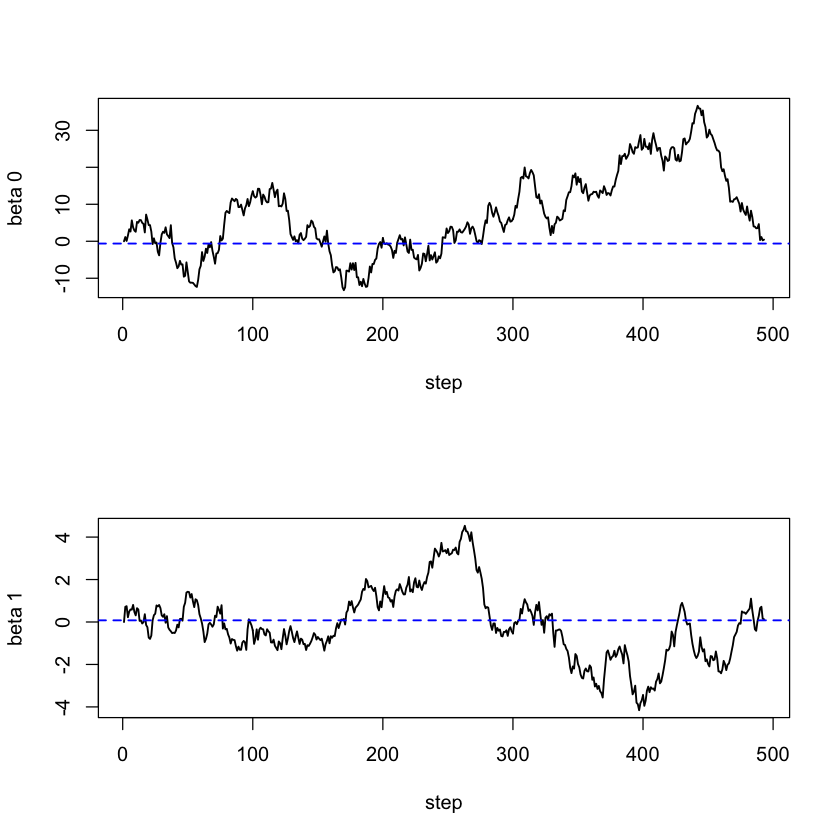

In [11]:
par(mfcol=c(2,1))

all.ylim<-c( min(c(history[,1],output$coef[1] )), max(c(history[,1],output$coef[1] )))
plot(history[,1], type="l", ylim=all.ylim, ylab="beta 0", xlab="step", lwd=1.5)
abline(h=output$coef[1], lty=2, col="blue", lwd=1.5)


all.ylim<-c( min(c(history[,2],output$coef[2] )), max(c(history[,2],output$coef[2] )))
plot(history[,2], type="l", ylim=all.ylim, ylab="beta 1", xlab="step", lwd=1.5)
abline(h=output$coef[2], lty=2, col="blue", lwd=1.5)

# dev.copy2pdf(file="./dpSGD.pdf")

As the plots above show, my `localSGD` function provides a DP-release of $\theta_0$ and $\theta_1$ that are close to true, non-DP $\theta$ values when I use an $\epsilon = 1$. We observe much more jitteriness in the values of the $\theta$s because we are adding much more noise in the local model. I tuned my learning rate parameters until I got good results using an $\epsilon=1$.

**Evaluate performance of the local model of DP-SGD**

Below, I evaluate the performance of the local model of DP-SGD by performing DP-releases for $\theta_0$ and $\theta_1$ for $\epsilon$s in ranging from $0.1$ to $10$. For each $\epsilon$, I perform 5 DP-releases, so that I can calculate a range of classification errors for each $\epsilon$ and calculate the RMSE of the DP-released parameters compared to the non-DP released parameters.

In [3]:
#function to calculate the classification error given the data and thetas for the model
calc_classf_error <- function(data, thetas){
    preds <- 1 / (1+ exp(-thetas[1] - thetas[2] * data[,2]) ); #perform linear combination of features
    preds[preds >= 0.5] <- 1; #convert probabilities >= 0.5 to 1s
    preds[preds < 0.5] <- 0; #convert probabilities < 0.5 to 0s
    
    y_true = data[[1]]; #get the true classifications
    comparison <- (preds == y_true); #compare the predictions to true labels
    error <- 1 - mean(comparison); #mean of comparison vector is accuracy. 1-accuracy is classification error
    return(error);
    
}

In [13]:
### SET-UP PARAMETERS
eps_vals <- c(0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0);
num_sims <- 5;
N <- nrow(marg_educ_data);
L <- round(sqrt(N));     # This is the recommended batch size- sqrt(# of training examples)
steps <- L; #number of iterations for SGD is same as the number of batches
delta = 1e-6;
C <- 10; 			  # Interval to clip over

#shuffle because we worry the data may have been sorted in some way
index <- sample(1:nrow(marg_educ_data), replace=FALSE); 
marg_educ_data <- marg_educ_data[index,];

thetas_history <- matrix(0, nrow=length(eps_vals)*num_sims, ncol=4);

row = 1;
for(eps in eps_vals){
    #printing for diagnostic purposes
    cat("Beginning simulations for epsilon= ", eps, '\n');
    cat(format(Sys.time(), "%a %b %d %X %Y"), '\n')
    
    for(l in 1:num_sims){
        #get a DP release of the thetas for the given epsilon
        history <- localSGD(data=marg_educ_data, N=N, batch_size=L, steps=steps, C=C, epsilon=eps, delta=1e-6);
        dp_thetas <- history[L+1, ];
        #calculate classificaiton error for this DP-release of thetas
        clsf_error <- calc_classf_error(data = marg_educ_data, thetas=dp_thetas);
        #save the thetas and classification error
        thetas_history[row, ] <- c(eps, dp_thetas, clsf_error); 
        row <- row + 1;
    }
}


Beginning simulations for epsilon=  0.1 
Sun Apr 28 18:36:08 2019 
Beginning simulations for epsilon=  0.25 
Sun Apr 28 18:38:53 2019 
Beginning simulations for epsilon=  0.5 
Sun Apr 28 18:41:40 2019 
Beginning simulations for epsilon=  0.75 
Sun Apr 28 18:44:26 2019 
Beginning simulations for epsilon=  1 
Sun Apr 28 18:47:12 2019 
Beginning simulations for epsilon=  2 
Sun Apr 28 18:49:56 2019 
Beginning simulations for epsilon=  5 
Sun Apr 28 18:52:37 2019 
Beginning simulations for epsilon=  10 
Sun Apr 28 18:55:21 2019 


In [14]:
#create dataframe from history matrix
thetas_history_df <- as.data.frame(thetas_history);
colnames(thetas_history_df) <- c("Epsilon", "Theta0", "Theta1", "Classification_Error");
#save the dataframe to analyze later
write.csv(thetas_history_df, './theta_vals.csv')

Below, I load the DP-releases of the theta values for different values of $\epsilon$.

In [1]:
thetas_history_df <- read.csv("./theta_vals.csv");

thetas_history_df

X,Epsilon,Theta0,Theta1,Classification_Error
1,0.10,-1.478539e+01,5.933797e+00,0.4513088
2,0.10,1.164043e+01,1.309560e+00,0.4527602
3,0.10,7.005811e-01,-2.380979e+00,0.5472398
4,0.10,-5.554668e+01,5.776009e+00,0.4538601
5,0.10,6.548709e+00,3.789757e-01,0.4527602
6,0.25,3.355382e+00,-1.911276e-01,0.4527602
7,0.25,-1.403541e+01,2.121839e+00,0.4473639
8,0.25,3.470551e+00,-2.720917e-01,0.5309515
9,0.25,-9.081222e+00,8.912470e-01,0.4562833
10,0.25,3.437159e+00,-2.501663e-01,0.4957946


Calculate the true values for $\beta_0$ and $\beta_1$. Also calculate the classification error for these values.

In [4]:
#get actual beta0 and beta1
PUMSdata <- read.csv(file="https://raw.githubusercontent.com/privacytoolsproject/cs208/master/data/MaPUMS5full.csv");     
marg_educ_data <- PUMSdata[c("married","educ")]; #get married and education data

#predict are you married {0,1} based on education
output <- glm(married ~ educ, family="binomial", data=marg_educ_data);

#calculate classification error for non-DP thetas
nondp_error <- calc_classf_error(data = marg_educ_data, thetas=output$coefficients);
nondp_error

[1] 0.4402804

In [5]:
#function to calculate the RMSE of DP-released thetas compared to true theta
calc_rmse <- function(theta_preds, true_theta){
    square_sum <- sum( (theta_preds - true_theta)^2 );
    rmse <- sqrt(square_sum);
    return(rmse);
}

#calculate RMSE values for thetas
unq_eps <- unique(thetas_history_df$Epsilon); #get unique epsilon values
rmse_matrix <- matrix(data = 0, nrow = length(unq_eps), ncol = 3);

row_counter = 1;
for(eps in unq_eps){
    eps_thetas <- thetas_history_df[thetas_history_df$Epsilon == eps, ];
    theta0_rmse <- calc_rmse(theta_preds = eps_thetas[['Theta0']], 
                         true_theta = output$coefficients[1]);
    theta1_rmse <- calc_rmse(theta_preds = eps_thetas[['Theta1']], 
                     true_theta = output$coefficients[2]);
    
    rmse_matrix[row_counter, ] <- c(eps, theta0_rmse, theta1_rmse);
    row_counter = row_counter + 1;
}
    
rmse_matrix_df <- as.data.frame(rmse_matrix);
colnames(rmse_matrix_df) <- c("Epsilon", "Theta0_RMSE", "Theta1_RMSE");
rmse_matrix_df

Epsilon,Theta0_RMSE,Theta1_RMSE
0.10,58.4897664,8.62586692
0.25,17.3367477,2.26721362
0.50,17.3861059,1.52739047
0.75,5.2143182,0.62752650
1.00,9.2045759,0.87378240
2.00,5.6627062,0.49357280
5.00,2.1886716,0.19687928
10.00,0.8359723,0.07511608


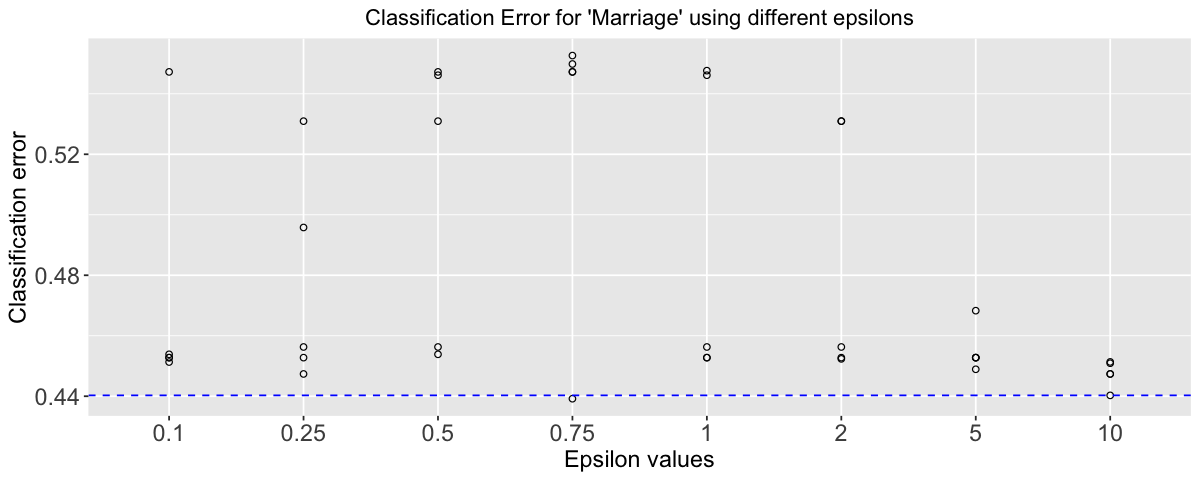

In [8]:
library(ggplot2)
# plot classification errors for different epsilon values
x_vals <- factor(thetas_history_df$Epsilon);
p1 <- ggplot(thetas_history_df) + 
    geom_point(aes(x=x_vals, y=thetas_history_df$Classification_Error), shape=21) +
    geom_hline(yintercept=nondp_error, linetype="dashed", color = "blue");
    
p1 <- p1 + labs(x = "Epsilon values", y = 'Classification error', title = 
        'Classification Error for \'Marriage\' using different epsilons') + 
    theme(plot.title = element_text(hjust = 0.5), 
          axis.text = element_text(size=14), axis.title = element_text(size = 14) );

options(repr.plot.width=10, repr.plot.height=4); #set plot dimensions
p1 #show plot

The dashed blue line represents the classification error of the non-DP released $\theta_0$ and $\theta_1$ when used to predict "Marriage" based on "Education".

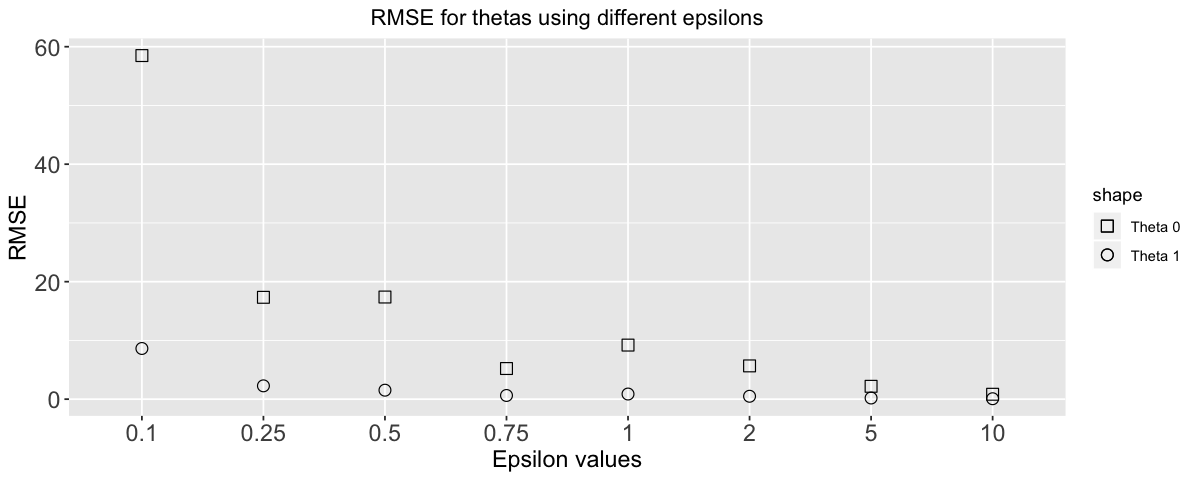

In [7]:
library(ggplot2)
# plot classification errors for different epsilon values
x_vals <- factor(rmse_matrix_df$Epsilon);
p1 <- ggplot(rmse_matrix_df) + 
    geom_point(aes(x=x_vals, y=rmse_matrix_df$Theta0_RMSE, shape='Theta 0'),fill='red', size=3) +
    geom_point(aes(x=x_vals, y=rmse_matrix_df$Theta1_RMSE, shape='Theta 1'),fill='blue',size=3);

p1 <- p1 + scale_shape_manual(values = c("Theta 0"=0, "Theta 1"=1));

p1 <- p1 + labs(x = "Epsilon values", y = 'RMSE', title = 
        'RMSE for thetas using different epsilons') + 
    theme(plot.title = element_text(hjust = 0.5), 
          axis.text = element_text(size=14), axis.title = element_text(size = 14) );

options(repr.plot.width=10, repr.plot.height=4); #set plot dimensions
p1 #show plot

The first graph shows the relationship between $\epsilon$ and classification error rate. For the most part, lower values of $\epsilon$ lead to higher classification error rate, as can be seen with $\epsilon = 0.25, 0.5,$ and $0.75$. Unexpectedly, the classification error for $\epsilon = 0.1$ is near the true classification error rate for most of the 5 trials, which could be due to the low number of simulations (5) run. I ran this simulation a few times, and the classification error rates at low values of $\epsilon$ jump around between 0.44 and 0.56 randomly, which might be due to the fact that we are only using one predictor for classifying "Marriage" status. When $\epsilon > 1$, the classification error for most trials shrinks toward the classification error observed with the non-DP $\theta$s (blue line), which is expected because we add less noise to the gradients with greater values of $\epsilon$.

The second graph displays the RMSE between the DP-released $\theta$s for a given value of $\epsilon$ and the non-DP released $\theta$s. Overall, as $\epsilon$ increases, we observe that the RMSE of the $\theta$s decreases, and at $\epsilon=10$, the RMSEs are almost 0. Although the classification error rate for $\epsilon=0.1$ was closer to baseline, the RMSE for the $\theta$s is the highest for $\epsilon=0.1$, which is expected because an $\epsilon=0.1$ leads to a larger standard deviation for the Normal distribution from which we draw noise. For all values of $\epsilon$, $\theta_1$ has a lower RMSE than $\theta_0$, which might be due to the larger learning rate for $\theta_1$, causing it to jump around much more with each update to it during SGD. The DP-released $\theta_0$ values are also generally an order of magnitude greater than their accompanying $\theta_1$ values, leading to the larger RMSE.